**Stock Market Technical Analysis**


[*********************100%%**********************]  1 of 1 completed


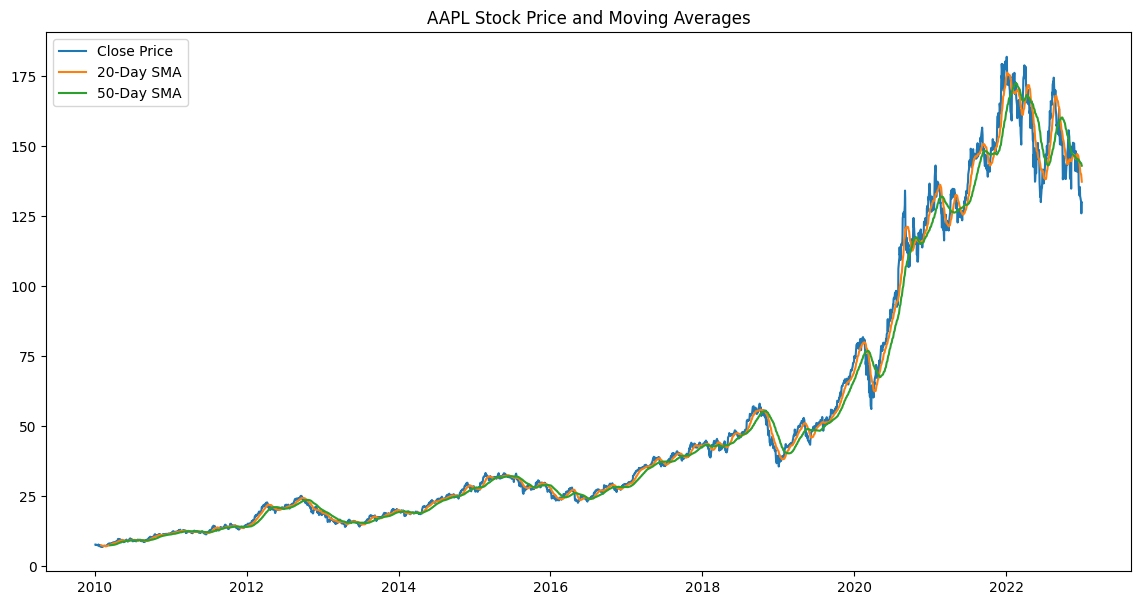

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Download AAPL stock data from Yahoo Finance
data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Calculate Simple Moving Averages
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Plot to visualize the SMAs
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_20'], label='20-Day SMA')
plt.plot(data['SMA_50'], label='50-Day SMA')
plt.title('AAPL Stock Price and Moving Averages')
plt.legend()
plt.show()


[*********************100%%**********************]  1 of 1 completed
C:\Users\vssd9\AppData\Local\Temp\ipykernel_33076\1656447095.py:26: RuntimeWarning: invalid value encountered in log
  data['RSI'] = 100 - (100 / (1 + data['Close'].diff().apply(lambda x: np.log(x+1)).rolling(window=14).mean()))
C:\Users\vssd9\AppData\Local\Temp\ipykernel_33076\1656447095.py:26: RuntimeWarning: divide by zero encountered in log
  data['RSI'] = 100 - (100 / (1 + data['Close'].diff().apply(lambda x: np.log(x+1)).rolling(window=14).mean()))


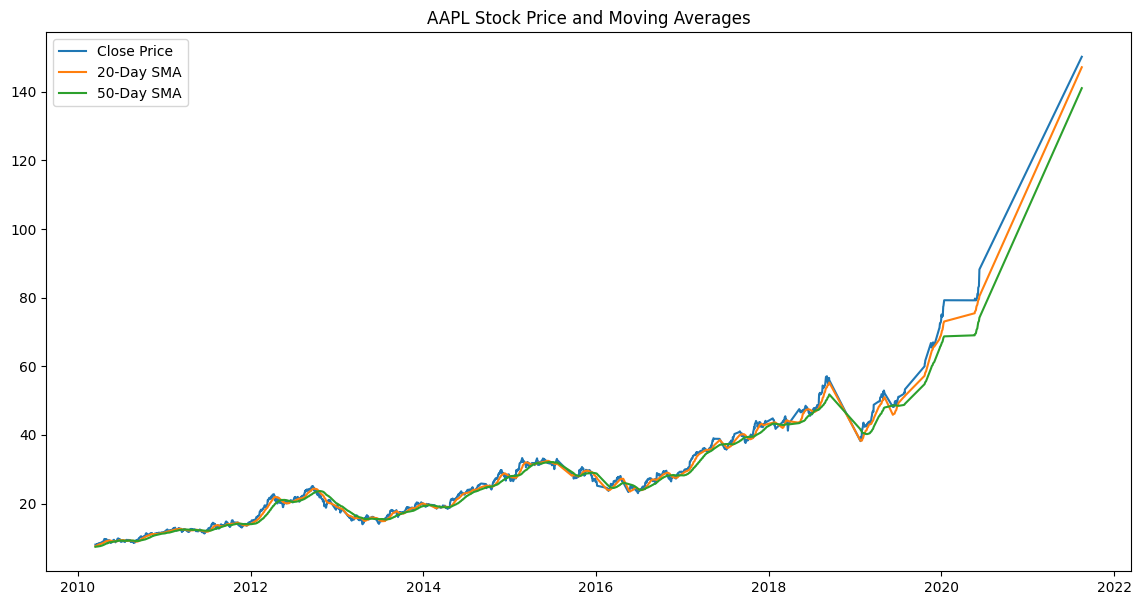

Linear Regression MSE: 0.5148114284960421
Decision Tree MSE: 293.6043925336224
Random Forest MSE: 298.1817712065029
Support Vector Regression MSE: 560.9809040634206
Epoch 1/100


C:\Users\vssd9\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0056 - val_loss: 2.8773e-04
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.1341e-04 - val_loss: 9.6654e-05
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.4066e-05 - val_loss: 1.4758e-04
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.3621e-05 - val_loss: 7.9743e-05
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 9.0622e-05 - val_loss: 1.0160e-04
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8.9265e-05 - val_loss: 6.1954e-05
Epoch 7/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.5686e-05 - val_loss: 7.2894e-05
Epoch 8/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.0199e-05 - val_loss: 5.1584e-05
Epoch 9/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 7.9700e-05 - val_loss: 7.1028e-05
Epoch 10/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 6.3122e-05 - val_loss: 8.0214e-05
Epoch 11/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.3748e-05 - v

C:\Users\vssd9\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\vssd9\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from pmdarima import auto_arima

# Download AAPL stock data from Yahoo Finance
data = yf.download('AAPL', start='2010-01-01', end='2023-01-01')

# Calculate Technical Indicators
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()
data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()
data['Bollinger_High'] = data['SMA_20'] + 2 * data['Close'].rolling(window=20).std()
data['Bollinger_Low'] = data['SMA_20'] - 2 * data['Close'].rolling(window=20).std()
data['RSI'] = 100 - (100 / (1 + data['Close'].diff().apply(lambda x: np.log(x+1)).rolling(window=14).mean()))

# Drop NaN values
data = data.dropna()

# Plot to visualize the SMAs
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_20'], label='20-Day SMA')
plt.plot(data['SMA_50'], label='50-Day SMA')
plt.title('AAPL Stock Price and Moving Averages')
plt.legend()
plt.show()

# Prepare the data
X = data[['SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'Bollinger_High', 'Bollinger_Low', 'RSI']]
y = data['Close']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
print(f'Linear Regression MSE: {lr_mse}')

# Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=10)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree MSE: {dt_mse}')

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)
print(f'Random Forest MSE: {rf_mse}')

# Support Vector Regression Model
svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, y_pred_svr)
print(f'Support Vector Regression MSE: {svr_mse}')

# LSTM Model
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data[['Close', 'SMA_20', 'SMA_50', 'EMA_20', 'EMA_50', 'Bollinger_High', 'Bollinger_Low', 'RSI']])

def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), :]
        X.append(a)
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 60
X_lstm, y_lstm = create_dataset(scaled_data, time_step)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], X_lstm.shape[2])

train_size = int(len(X_lstm) * 0.80)
X_train_lstm, X_test_lstm = X_lstm[:train_size], X_lstm[train_size:]
y_train_lstm, y_test_lstm = y_lstm[:train_size], y_lstm[train_size:]

model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(time_step, X_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_lstm, y_train_lstm, batch_size=32, epochs=100, validation_split=0.1)

y_pred_lstm = model.predict(X_test_lstm)
y_pred_lstm = scaler.inverse_transform(np.concatenate((y_pred_lstm, np.zeros((y_pred_lstm.shape[0], X_lstm.shape[2] - 1))), axis=1))[:, 0]

lstm_mse = mean_squared_error(y_test_lstm, y_pred_lstm)
print(f'LSTM Model MSE: {lstm_mse}')

# ARIMA Model
data_close = data['Close']
train_size = int(len(data_close) * 0.80)
train_close, test_close = data_close[:train_size], data_close[train_size:]

arima_model = auto_arima(train_close, start_p=1, start_q=1, max_p=5, max_q=5, m=1, seasonal=False, stepwise=True)
arima_model.fit(train_close)

pred_arima = arima_model.predict(n_periods=len(test_close))
arima_mse = mean_squared_error(test_close, pred_arima)
print(f'ARIMA Model MSE: {arima_mse}')

